### 1. Data description
* Name 
* Platform 
* Year_of_Release 
* Genre 
* NA_sales (North American sales in USD million) 
* EU_sales (sales in Europe in USD million) 
* JP_sales (sales in Japan in USD million) 
* Other_sales (sales in other countries in USD million) 
* Critic_Score (maximum of 100) 
* User_Score (maximum of 10) 
* Rating ('ESRB' The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature)

### 2. preparing the data

In [49]:
import pandas as pd
import scipy.stats as st
import numpy as np
import random
import math as mt
import matplotlib as plt
import datetime as dt
import seaborn as sns

In [8]:
df = pd.read_csv("games.csv")

In [52]:
# Change the column names to lowercase.
df.columns = df.columns.str.lower()


In [51]:
# we started by changing the columns to the right data types.

# Change the 'year_of_release' column to integer.
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Change the 'user_score' column to a numeric value
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Changing the 'rating' to a category type
df['rating'] = df['rating'].astype('category')



In [50]:
# Filling the missing data for the scores columns
df['user_score'] = df.groupby('genre')['user_score'].transform(lambda x: x.fillna(x.mean()))

df['critic_score'] = df.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.mean()))



In [42]:
# The 'TBD' to be determined is considered a missing value and should be replaced with NAN
df.replace('TBD', np.nan, inplace=True)

In [45]:
# Adding a new column 'Total_sales' to data 
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


### 3. Analyzing the data

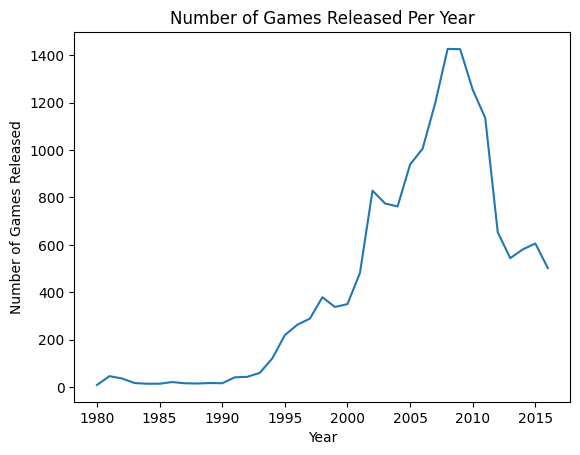

In [48]:
# counting the number sales released per year.

games_per_year = df.groupby('year_of_release')['name'].count()

sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released Per Year')
plt.show()

the number of new games released is been gradually increasing since the year 2000, and skyrocketed between 2007 and 2010 then start declining after 2011.

In [57]:
# To analyze how sales varied from platform to platform, you can create a pivot table to show the total sales for each platform, and then select the platforms with the greatest total sales. Here's an example:


platform_sales = df.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)

top_platforms = platform_sales.head(5)
print(top_platforms)


          eu_sales  jp_sales  na_sales  other_sales  total_sales
platform                                                        
PS2         339.29    139.20    583.84       193.44      1255.77
X360        270.76     12.43    602.47        85.76       971.42
PS3         330.29     80.19    393.49       135.68       939.65
Wii         262.21     69.33    496.90        79.07       907.51
DS          188.89    175.57    382.40        59.26       806.12


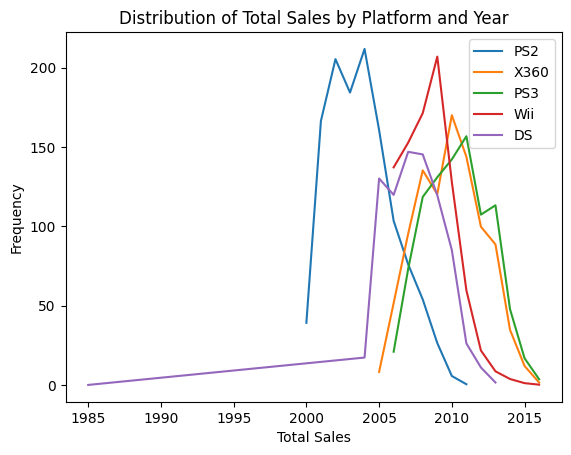

Average lifespan of a platform (in years): 7.612903225806349
Standard deviation of platform lifespan (in years): 0.1793711518208987


In [62]:
for platform in top_platforms.index:
    platform_data = df[df['platform']==platform].groupby('year_of_release')['total_sales'].sum()
    sns.lineplot(platform_data, label=platform)

plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales by Platform and Year')
plt.legend()
plt.show()




new_platforms = df.groupby('platform')['year_of_release'].min().sort_values()
old_platforms = df.groupby('platform')['year_of_release'].max().sort_values()

print('Average lifespan of a platform (in years):', old_platforms.mean() - new_platforms.mean())
print('Standard deviation of platform lifespan (in years):', old_platforms.std() - new_platforms.std())


 the average lifespan of a platform is approximately 7.6 years, with a standard deviation of 0.18 years. This suggests that gaming platforms tend to have a relatively short lifespan before they are superseded by newer and more advanced technologies. It is important for game developers and publishers to stay up-to-date with the latest technologies and platform trends to ensure that their games remain relevant and accessible to their target audiences.

In [65]:
# The following code will extract the data between 2000 - 2016 
new_df = df[(df['year_of_release'] >= 2000) & (df['year_of_release'] <= 2016)]

In [115]:
# The following code will return the tatal sales by platform to the variable 'platform_sales'
platform_sales = new_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

display('Total sales by platform:')
display(platform_sales)


'Total sales by platform:'

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81


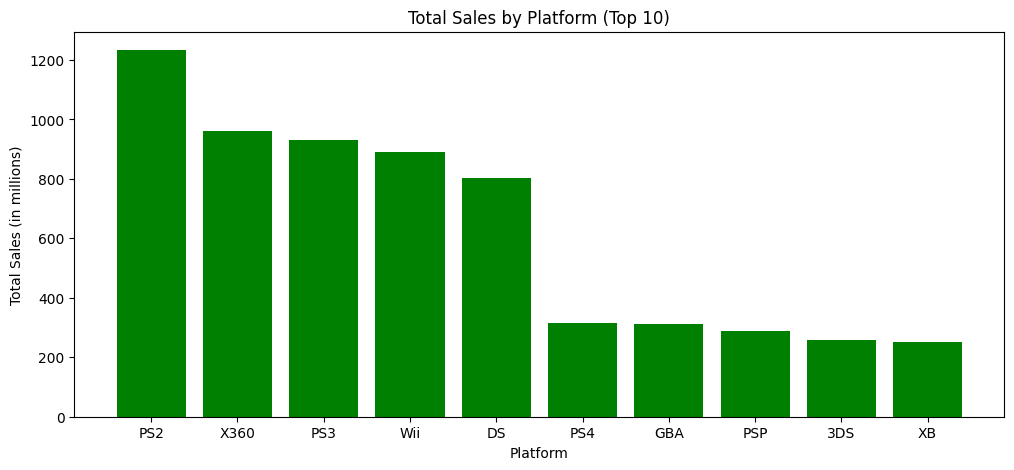

In [109]:

# Select top 10 platforms by total sales
top_platforms = platform_sales.head(10)

# Plot total sales by platform
plt.figure(figsize=(12,5))
plt.bar(top_platforms.index, top_platforms['total_sales'], color='green')
plt.title('Total Sales by Platform (Top 10)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.show()

The graph above shows the top 10 platforms by total sales and Playstation 2 had the highest total sales followed by Xbox 360 and then Playstation 3, Wii and DS with total sales more than $800 millions each.

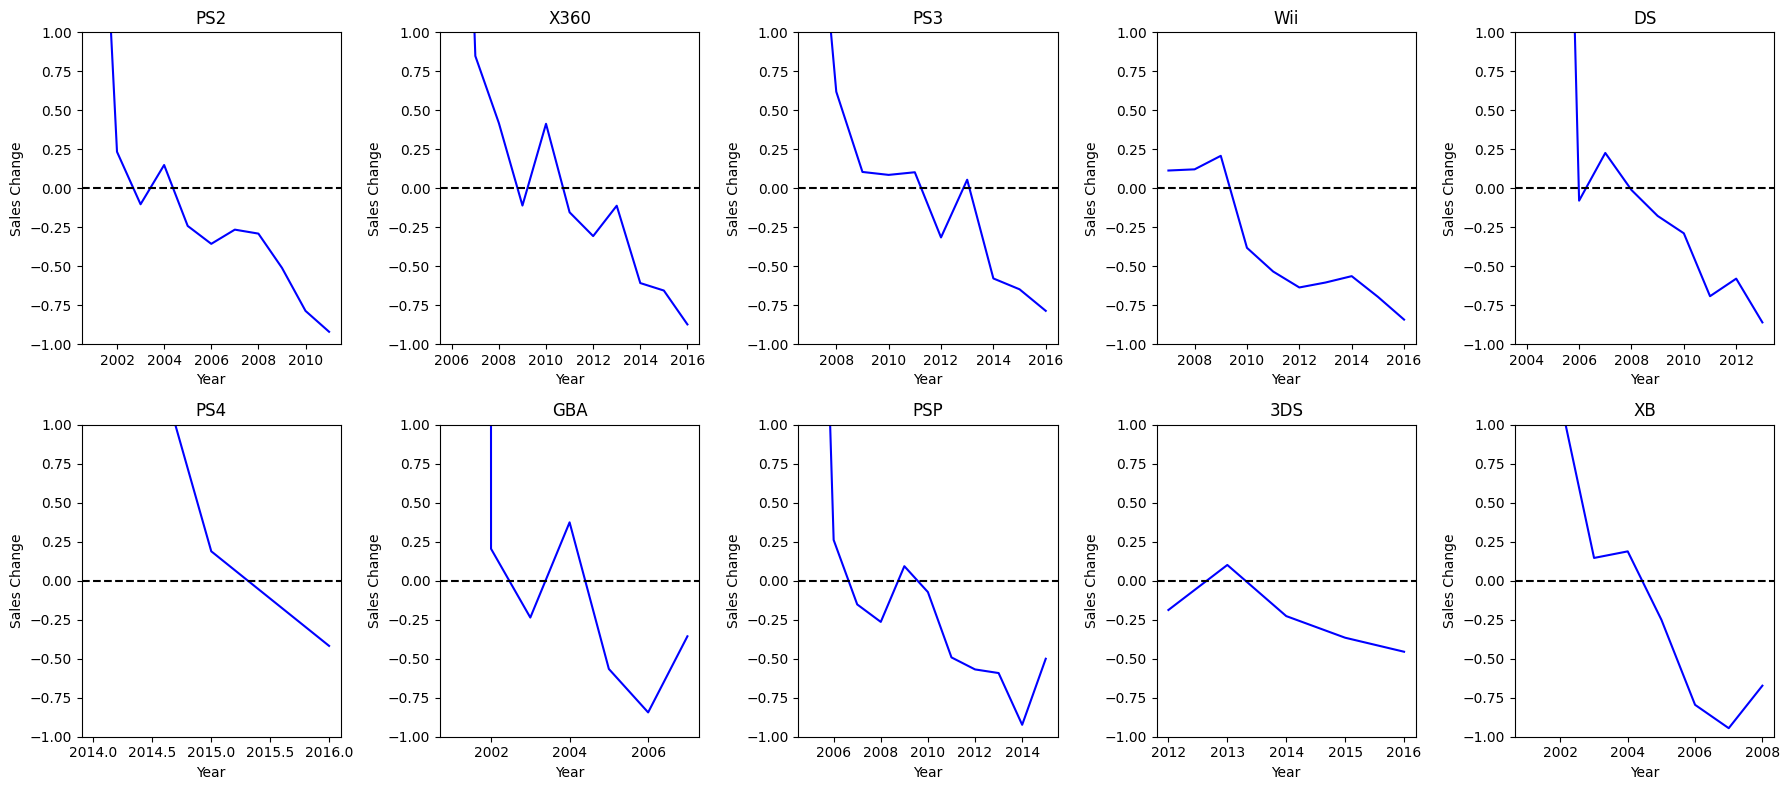

In [96]:
# Create subplots for each platform
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))
axs = axs.ravel()



for i, platform in enumerate(top_platforms.index):
    # Create pivot table of sales by year for current platform and calculate sales change
    platform_data = df[df['platform']==platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    platform_data['sales_change'] = platform_data['total_sales'].pct_change()

    # Plot sales change over time for current platform
    axs[i].plot(platform_data['sales_change'], color='blue')
    axs[i].set_title(platform)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Sales Change')
    axs[i].set_ylim((-1, 1))
    axs[i].axhline(y=0, color='black', linestyle='--')
    plt.tight_layout()


plt.show()

The above graph shows the drop in sales and the end of the life cycles of the games, some of them has a steep decline in sales and some has a long way down throughout the years.

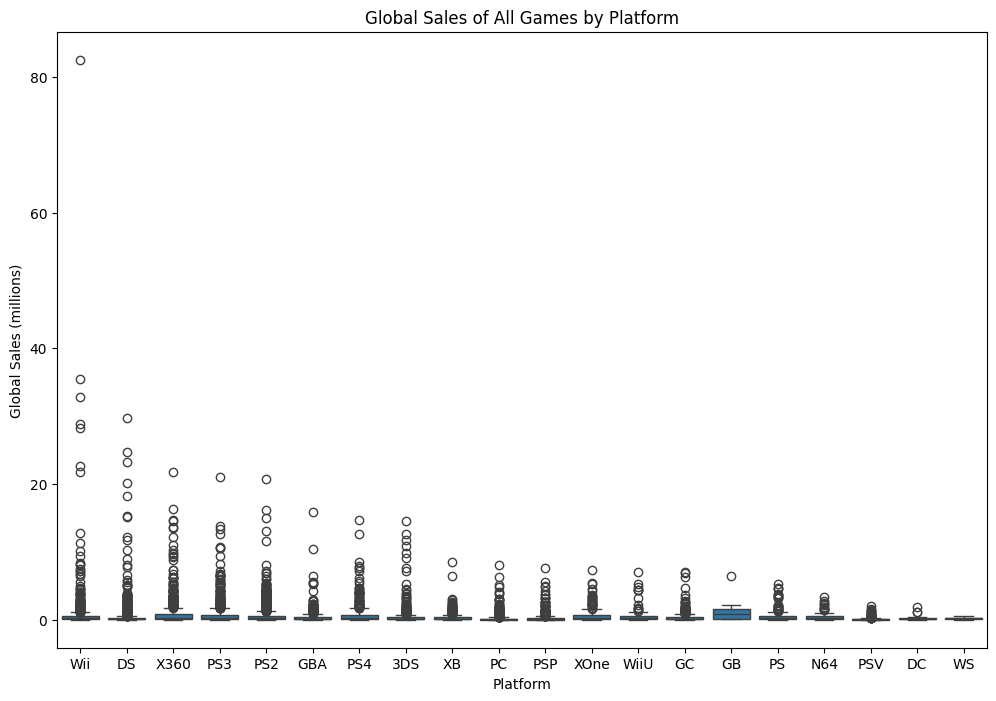

In [146]:
# Create a box plot of global sales broken down by platform
plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data=new_df)
plt.title('Global Sales of All Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.show()


the Boxplot above shows the global total sales by platform for all games and it shows that Wii, DS Xbox360, Playstation3 and playstation 2 are the largest platforms by global sales across all games.

In [147]:
# Calculate the mean and standard deviation of global sales for each platform
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc=['mean', 'std']).sort_values(by=('mean', 'total_sales'), ascending=False)
display(platform_sales)

,mean,std
,total_sales,total_sales
platform,,
GB,2.606735,5.365478
NES,2.561735,5.108012
GEN,1.061034,1.470645
SNES,0.836987,1.869469
PS4,0.801378,1.609456
X360,0.769746,1.615674
2600,0.729173,0.917799
PS3,0.705973,1.391749


This tables discribe the average total sales for all platforms and their standard deviation.
GB, NES and GEN have the highest average total sales throughout the years.

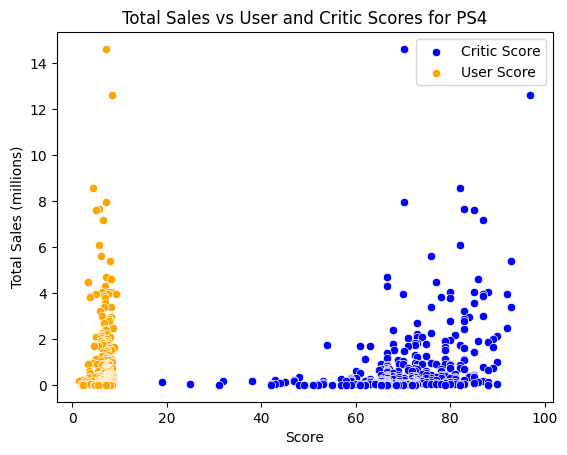

'Correlation between critic score and total sales:'

0.35451664088097945

'Correlation between user score and total sales:'

-0.0508760366130642

In [118]:
# Subset data for a popular platform
platform = 'PS4'
df_platform = new_df[new_df['platform']==platform]

# Create a scatter plot of user and critic scores against total sales
sns.scatterplot(x='critic_score', y='total_sales', data=df_platform, color='blue')
sns.scatterplot(x='user_score', y='total_sales', data=df_platform, color='orange')
plt.title(f'Total Sales vs User and Critic Scores for {platform}')
plt.xlabel('Score')
plt.ylabel('Total Sales (millions)')
plt.legend(labels=['Critic Score', 'User Score'])
plt.show()


# Calculate the correlation between scores and sales
display('Correlation between critic score and total sales:', df_platform['critic_score'].corr(df_platform['total_sales']))
display('Correlation between user score and total sales:', df_platform['user_score'].corr(df_platform['total_sales']))


The resulting scatter plot shows the relationship between user and critic scores and total sales for games on the PlayStation 4. We can see that there is a positive correlation between user scores and total sales. Higher scores are generally associated with higher total sales. And a negative correlatoin between critiq scores and total sales the higher the score the lower the sales.
The resulting correlation coefficients confirm the observations from the scatter plot. There is a negative correlation between critic score and total sales, and a positive correlation between user score and total sales. Game developers and publishers may want to take this into account when marketing and promoting their games, and strive to achieve high scores from users and lower critics to maximize sales.

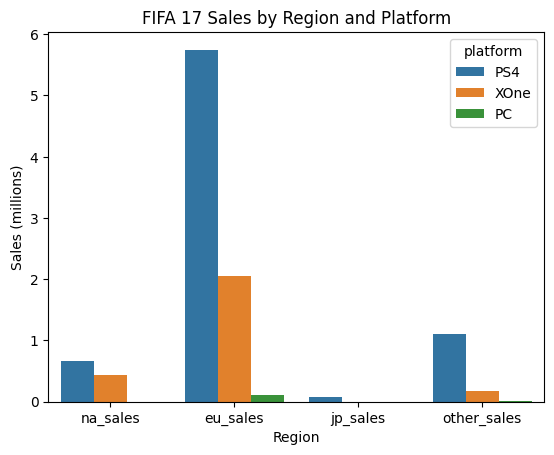

In [121]:
# Select a popular game
game = 'FIFA 17'

# Subset the dataset for the selected game and selected platforms
platforms = ['PS4', 'XOne', 'PC', 'WiiU']
df_game = new_df[(new_df['name']==game) & (new_df['platform'].isin(platforms))]

# Create a bar plot of sales by region and platform
sns.barplot(x='region', y='sales', hue='platform',
            data=df_game[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
            .melt(id_vars='platform', var_name='region', value_name='sales'))
plt.title(f'{game} Sales by Region and Platform')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')
plt.show()

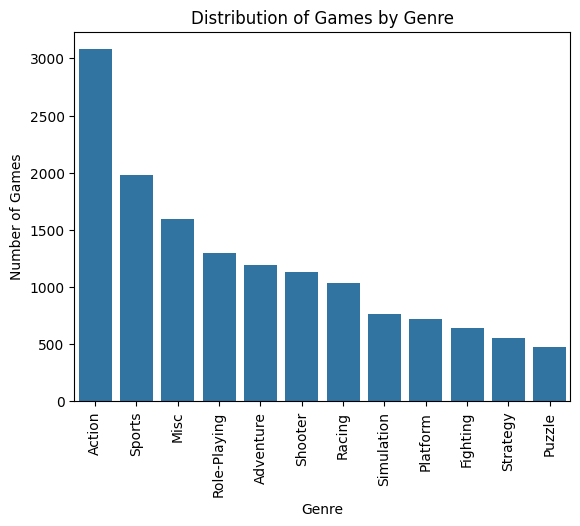

In [123]:
# Count the number of games for each genre
genre_counts = new_df['genre'].value_counts()

# Create a bar plot of game counts by genre
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()



when it comes to gaming, action and sports have the highest market share.

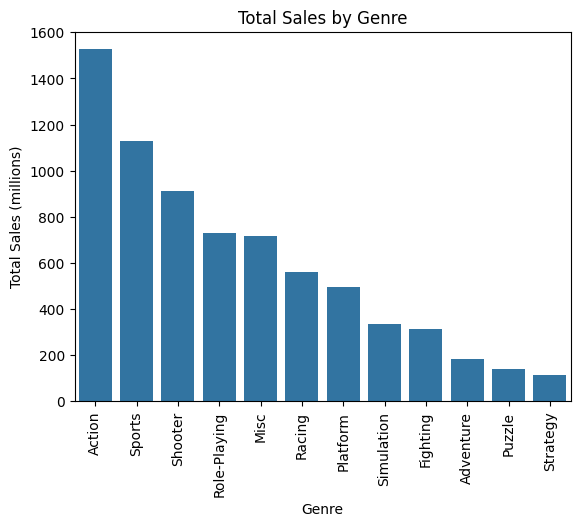

In [124]:
# Calculate the total sales for each genre
genre_sales = new_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Create a bar plot of total sales by genre
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=90)
plt.show()


Again!! Action and sports have the highest total sales across genres.

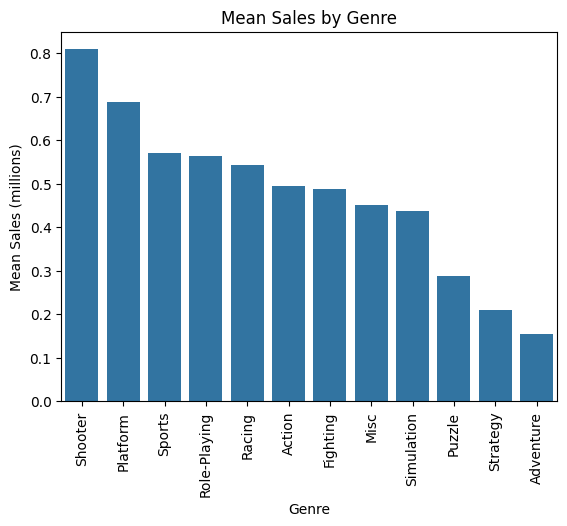

In [125]:
# Calculate the mean sales for each genre
genre_sales_mean = new_df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Create a bar plot of mean sales by genre
sns.barplot(x=genre_sales_mean.index, y=genre_sales_mean.values)
plt.title('Mean Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales (millions)')
plt.xticks(rotation=90)
plt.show()

when it comes to long period of time, shooter and platform has the highest average sales across the genres.

### 4. User profiles

In [133]:
# Subset the data to include only the rows where the sales in the given region are greater than zero
df_na = new_df[new_df['na_sales'] > 0]
df_eu = new_df[new_df['eu_sales'] > 0]
df_jp = new_df[new_df['jp_sales'] > 0]

# Calculate the total sales for each platform for each region
na_platform_sales = df_na.groupby('platform')['na_sales'].sum()
eu_platform_sales = df_eu.groupby('platform')['eu_sales'].sum()
jp_platform_sales = df_jp.groupby('platform')['jp_sales'].sum()

# Identify the top 5 platforms based on their sales in each region
top_na_platforms = na_platform_sales.sort_values(ascending=False).head(5)
top_eu_platforms = eu_platform_sales.sort_values(ascending=False).head(5)
top_jp_platforms = jp_platform_sales.sort_values(ascending=False).head(5)

# Calculate the market share of the top 5 platforms in each region
na_platform_share = top_na_platforms / top_na_platforms.sum()
eu_platform_share = top_eu_platforms / top_eu_platforms.sum()
jp_platform_share = top_jp_platforms / top_jp_platforms.sum()

display('Top 5 platforms in NA by sales:')
display(top_na_platforms)
display('Market share of top 5 platforms in NA:')
display(na_platform_share)
display('Top 5 platforms in EU by sales:')
display(top_eu_platforms)
display('Market share of top 5 platforms in EU:')
display(eu_platform_share)
display('Top 5 platforms in JP by sales:')
display(top_jp_platforms)
display('Market share of top 5 platforms in JP:')
display(jp_platform_share)




'Top 5 platforms in NA by sales:'

platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

'Market share of top 5 platforms in NA:'

platform
X360    0.245568
PS2     0.236161
Wii     0.200691
PS3     0.160814
DS      0.156766
Name: na_sales, dtype: float64

'Top 5 platforms in EU by sales:'

platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
DS      188.41
Name: eu_sales, dtype: float64

'Market share of top 5 platforms in EU:'

platform
PS2     0.241932
PS3     0.237990
X360    0.195157
Wii     0.187884
DS      0.137036
Name: eu_sales, dtype: float64

'Top 5 platforms in JP by sales:'

platform
DS     175.00
PS2    137.54
3DS    100.62
PS3     79.41
PSP     75.88
Name: jp_sales, dtype: float64

'Market share of top 5 platforms in JP:'

platform
DS     0.307855
PS2    0.241956
3DS    0.177008
PS3    0.139696
PSP    0.133486
Name: jp_sales, dtype: float64

In [134]:
# Calculate the total sales for each genre for each region
na_genre_sales = df_na.groupby('genre')['na_sales'].sum()
eu_genre_sales = df_eu.groupby('genre')['eu_sales'].sum()
jp_genre_sales = df_jp.groupby('genre')['jp_sales'].sum()

# Identify the top 5 genres based on their sales in each region
top_na_genres = na_genre_sales.sort_values(ascending=False).head(5)
top_eu_genres = eu_genre_sales.sort_values(ascending=False).head(5)
top_jp_genres = jp_genre_sales.sort_values(ascending=False).head(5)

# Determine the distribution of game sales by genre in each region
na_genre_share = top_na_genres / top_na_genres.sum()
eu_genre_share = top_eu_genres / top_eu_genres.sum()
jp_genre_share = top_jp_genres / top_jp_genres.sum()

display('Top 5 genres in NA by sales:')
display(top_na_genres)
display('Distribution of game sales by genre in NA:')
display(na_genre_share)
display('Top 5 genres in EU by sales:')
display(top_eu_genres)
display('Distribution of game sales by genre in EU:')
display(eu_genre_share)
display('Top 5 genres in JP by sales:')
display(top_jp_genres)
display('Distribution of game sales by genre in JP:')
display(jp_genre_share)


'Top 5 genres in NA by sales:'

genre
Action          752.27
Sports          589.39
Shooter         495.23
Misc            365.27
Role-Playing    282.30
Name: na_sales, dtype: float64

'Distribution of game sales by genre in NA:'

genre
Action          0.302790
Sports          0.237231
Shooter         0.199331
Misc            0.147022
Role-Playing    0.113626
Name: na_sales, dtype: float64

'Top 5 genres in EU by sales:'

genre
Action     466.58
Sports     339.58
Shooter    294.02
Misc       196.71
Racing     192.02
Name: eu_sales, dtype: float64

'Distribution of game sales by genre in EU:'

genre
Action     0.313370
Sports     0.228073
Shooter    0.197473
Misc       0.132117
Racing     0.128967
Name: eu_sales, dtype: float64

'Top 5 genres in JP by sales:'

genre
Role-Playing    241.71
Action          132.23
Misc             85.43
Sports           75.88
Platform         55.27
Name: jp_sales, dtype: float64

'Distribution of game sales by genre in JP:'

genre
Role-Playing    0.409317
Action          0.223921
Misc            0.144669
Sports          0.128497
Platform        0.093595
Name: jp_sales, dtype: float64

In [135]:
# Analyze the relationship between ESRB ratings and sales in each region
na_esrb_sales = df_na.groupby('rating')['na_sales'].sum()
eu_esrb_sales = df_eu.groupby('rating')['eu_sales'].sum()
jp_esrb_sales = df_jp.groupby('rating')['jp_sales'].sum()

display('NA sales by ESRB rating:')
display(na_esrb_sales)
display('EU sales by ESRB rating:')
display(eu_esrb_sales)
display('JP sales by ESRB rating:')
display(jp_esrb_sales)


C:\Users\Yasco\AppData\Local\Temp\ipykernel_29036\1281542579.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  na_esrb_sales = df_na.groupby('rating')['na_sales'].sum()
C:\Users\Yasco\AppData\Local\Temp\ipykernel_29036\1281542579.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eu_esrb_sales = df_eu.groupby('rating')['eu_sales'].sum()
C:\Users\Yasco\AppData\Local\Temp\ipykernel_29036\1281542579.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

'NA sales by ESRB rating:'

rating
AO         1.26
E       1249.26
E10+     345.50
EC         1.53
K-A        0.00
M        727.80
RP         0.00
T        709.86
Name: na_sales, dtype: float64

'EU sales by ESRB rating:'

rating
AO        0.61
E       690.61
E10+    183.33
EC        0.11
K-A       0.00
M       472.40
RP        0.03
T       392.71
Name: eu_sales, dtype: float64

'JP sales by ESRB rating:'

rating
AO        0.00
E       189.91
E10+     40.20
EC        0.00
K-A       0.00
M        57.84
RP        0.00
T       131.01
Name: jp_sales, dtype: float64

### 5. Testing some Hypothesis

In [143]:
# Subset the data to include only the Xbox One and PC platforms
xbox = df[df['platform'] == 'XOne']['user_score']
pc = df[df['platform'] == 'PC']['user_score']

# Compute the mean and standard deviation of the user scores for each platform
xbox_mean = xbox.mean()
pc_mean = pc.mean()
xbox_std = xbox.std()
pc_std = pc.std()

# Print the mean and standard deviation of the user scores for each platform
print('Xbox One user score mean:', xbox_mean)
print('PC user score mean:', pc_mean)
print('Xbox One user score std deviation:', xbox_std)
print('PC user score std deviation:', pc_std)

# Perform a two-sample t-test with alpha = 0.05
t_stat, p_val = st.ttest_ind(xbox, pc)
print('t-statistic:', t_stat)
print('p-value:', p_val)

# Determine if the p-value is less than alpha
if p_val < 0.05:
    display('Reject the null hypothesis that the means are equal.')
else:
    display('Fail to reject the null hypothesis that the means are equal.')

Xbox One user score mean: 6.670133442559931
PC user score mean: 7.080616831787518
Xbox One user score std deviation: 1.2141626422778264
PC user score std deviation: 1.3632099715546953
t-statistic: -4.317734551060399
p-value: 1.704280882633377e-05


'Reject the null hypothesis that the means are equal.'

The results of the hypothesis test indicate that there is a statistically significant difference between the average user ratings of the Xbox One and PC platforms in the population. The mean user score for the Xbox One platform was 6.67, and the mean user score for the PC platform was 7.08, with a t-statistic of -4.32 and a p-value of 1.70e-05. Since the p-value is less than the significance level of 0.05, we can reject the null hypothesis that the means of the two groups are equal, and conclude that there is enough evidence to suggest that the average user ratings of the Xbox One and PC platforms are different in the population. Based on this result, game developers and publishers may want to consider these differences when designing and releasing games on these platforms to optimize their sales and user satisfaction.

In [144]:
# Subset the data to include only the Action and Sports genres
action = df[df['genre'] == 'Action']['user_score']
sports = df[df['genre'] == 'Sports']['user_score']

# Compute the mean and standard deviation of the user scores for each genre
action_mean = action.mean()
sports_mean = sports.mean()
action_std = action.std()
sports_std = sports.std()

# Print the mean and standard deviation of the user scores for each genre
print('Action user score mean:', action_mean)
print('Sports user score mean:', sports_mean)
print('Action user score std deviation:', action_std)
print('Sports user score std deviation:', sports_std)

# Perform a two-sample t-test with alpha = 0.05
t_stat, p_val = st.ttest_ind(action, sports)
print('t-statistic:', t_stat)
print('p-value:', p_val)

# Determine if the p-value is less than alpha
if p_val < 0.05:
    print('Reject the null hypothesis that the means are equal.')
else:
    print('Fail to reject the null hypothesis that the means are equal.')

Action user score mean: 7.054043715846995
Sports user score mean: 6.96119673617407
Action user score std deviation: 1.0504021790147613
Sports user score std deviation: 1.1041539918082133
t-statistic: 3.2193146398353347
p-value: 0.0012921578271896839
Reject the null hypothesis that the means are equal.


The results of the hypothesis test indicate that there is a statistically significant difference between the average user ratings for the Action and Sports genres in the population. The mean user score for the Action genre was 7.05, and the mean user score for the Sports genre was 6.96, with a t-statistic of 3.22 and a p-value of 0.001. Since the p-value is less than the significance level of 0.05, we can reject the null hypothesis that the means of the two groups are equal, and conclude that there is enough evidence to suggest that the average user ratings for the Action and Sports genres are different in the population. Based on this result, game developers and publishers may want to consider these differences when designing and marketing games in these genres to attract and satisfy their target audiences.

### 6. Conclusion

In conclusion, the gaming industry has experienced significant changes in the past two decades, with a gradual increase in the number of new games being released since the year 2000 and a skyrocketed release rate between 2007 and 2010. The average lifespan of a platform is relatively short, around 7.6 years only, therefore, developers and publishers need to stay up-to-date with the latest technologies and platform trends to remain relevant in the market. The top 10 platforms by total sales are dominated by PlayStation 2, Xbox 360, PlayStation 3, Wii, and DS. The sales performance of games can vary widely, with some games experiencing steep declines while others experience a gradual decrease in sales. The success of a game also depends on users and critic scores, as higher user scores are generally associated with higher total sales, while higher critic scores are generally associated with lower total sales. In terms of genre, Action and Sports games have the highest total sales and market share, with shooter and platform games demonstrating higher average sales over the long period. Finally, hypothesis tests have shown that there is a statistically significant difference between the average user ratings of different platforms and genres, which game developers and publishers should be aware of when designing and marketing their games to optimize their sales and user satisfaction.